In [1]:
# 基本设置 , 导入库
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from util.note_parser import *
from util.parser import get_data

sns.set_style('whitegrid', {'font.sans-serif': ['simhei', 'Arial']})


In [2]:
# seaborn 使用的 相关资料路径 api
# def get_file_path(file_name):
#     import os
#     project_path = os.path.dirname(os.getcwd())
#     note_path = r"{}\data\seaborn_data\{}".format(project_path, file_name)
#
#     return note_path


In [2]:
volume1_file_path = get_file_path('volume1.txt')
volume2_file_path = get_file_path('volume2.txt')

# 获取 第一, 二卷小说 以每章划分为单位的 list
volume1_chapter_list = get_chapter_list(volume1_file_path)
volume2_chapter_list = get_chapter_list(volume2_file_path)

# 打印每卷 章节数
print("volume1 chapter count: {}".format(len(volume1_chapter_list)))
print("volume2 chapter count: {}".format(len(volume2_chapter_list)))

# 设置 保存csv 路径以及文件名
volume1_chapter_csv_file_path = get_file_path('volume1_discrete_chapter_word.csv')
volume2_chapter_csv_file_path = get_file_path('volume2_discrete_chapter_word.csv')

# 保存
save_chapter_count_to_csv_file(volume1_chapter_list, volume1_chapter_csv_file_path)
save_chapter_count_to_csv_file(volume2_chapter_list, volume2_chapter_csv_file_path)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache


C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume1.txt


Loading model cost 0.669 seconds.
Prefix dict has been built successfully.


C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume2.txt
volume1 chapter count: 29
volume2 chapter count: 45
ok! csv_file => C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume1_discrete_chapter_word.csv
ok! csv_file => C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume2_discrete_chapter_word.csv


In [3]:
# 保存 第一, 二卷 分词统计 (以卷为单位) 为csv文件

volume1_count_csv_file_path = get_file_path("volume1_split_word.csv")
volume2_count_csv_file_path = get_file_path("volume2_split_word.csv")
save_volume_count_to_csv_file(volume1_file_path, volume1_count_csv_file_path)
save_volume_count_to_csv_file(volume2_file_path, volume2_count_csv_file_path)


ok! csv_file => C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume1_split_word.csv
ok! csv_file => C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume2_split_word.csv


In [5]:


df1_chapter_word = pd.read_csv(volume1_chapter_csv_file_path)
df2_chapter_word = pd.read_csv(volume2_chapter_csv_file_path)

df1_volume = pd.read_csv(volume1_count_csv_file_path)
df2_volume = pd.read_csv(volume2_count_csv_file_path)



In [6]:
# plot1 关于 第二卷主要人物在每个章节出现的次数统计, 以热量图显示展现
volume2_name_list = ['道静', '江华', '郑瑾', '晓燕', '姑母', '侯瑞', '徐辉', '大娘', '李奎英', ]
sieve = df2_chapter_word.loc[df2_chapter_word['word'].isin(volume2_name_list)]

sieve = sieve.pivot(index="word", columns="chapter", values="count")

sieve = sieve.replace(np.nan, 0)

print(sieve)



chapter    1     2     3     4     5     6     7     8     9     10  ...  \
word                                                                 ...   
侯瑞        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
大娘        0.0   0.0   0.0   0.0   0.0   0.0  14.0   2.0  30.0   1.0  ...   
姑母        0.0   1.0   1.0   0.0   0.0  19.0  50.0  29.0  20.0   2.0  ...   
徐辉        9.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
晓燕        2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
江华       39.0  59.0  22.0   8.0   2.0   5.0   2.0   1.0   0.0   0.0  ...   
道静       29.0  50.0   4.0  24.0  23.0  30.0  54.0  45.0  31.0  26.0  ...   
郑瑾        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

chapter    36    37   38    39    40    41    42   43   44    45  
word                                                              
侯瑞       11.0   0.0  8.0   1.0   0.0   4.0   0.0  1.0  0.0   5.0  
大娘        0.0   0.0  0.0   0.0   0.0  

<AxesSubplot:xlabel='chapter', ylabel='word'>

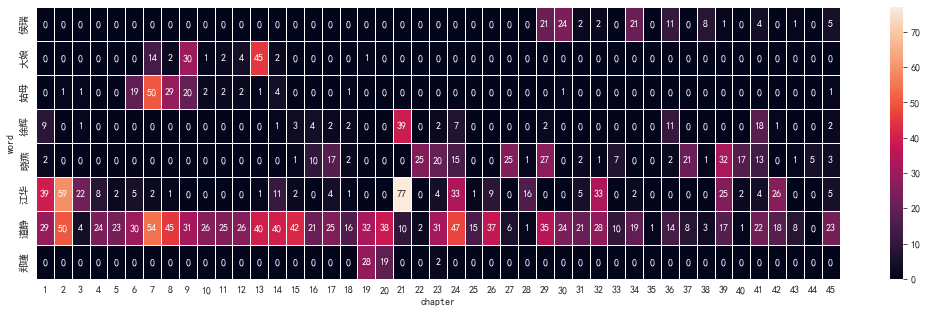

In [7]:
f, ax = plt.subplots(figsize=(18, 5))
sns.heatmap(sieve, annot=True, linewidths=.5, ax=ax)


In [8]:
volume1_name_list = [ '道静', '永泽', '戴愉', '徐宁', '嘉川', '白莉苹', '晓燕']

character_name_list = ['道静', '晓燕', '']


In [9]:
# python3

import  jieba
str = "主人白莉苹的美丽俊俏的笑脸和灵活的黑亮的眼睛是特别引人注意的目标"

result = ''
word_list = jieba.lcut(str)   # 分词后返回一个列表  jieba.cut(）   返回的是一个迭代器
def get_stopword_list(file):
    with open(file, 'r', encoding='utf-8') as f:    #
        stopword_list = [word.strip('\n') for word in f.readlines()]
    return stopword_list

stopword_list = get_stopword_list(get_file_path('hit_stopwords.txt'))

for w in word_list:
    if w not in stopword_list:
        result += w

print(result)

result = list(jieba.cut(result, cut_all=False))
print(result)



主人白莉苹美丽俊俏笑脸灵活黑亮眼睛特别引人注意目标
['主人', '白莉苹', '美丽', '俊俏', '笑脸', '灵活', '黑亮', '眼睛', '特别', '引人注意', '目标']


In [10]:
from util.note_parser  import  *
print(get_file_path('hit_stopwords.txt'))

C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\hit_stopwords.txt
